In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# File path
parquet_file = '/Users/keceli/Library/CloudStorage/Box-Box/Project_II_2024_2026/Project_5_Benchmarking_computational_methods_for_TM_structure_optimization/data/sarah_33805_251201.parquet'

# Read the parquet file
df = pd.read_parquet(parquet_file)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")


Dataset shape: (33805, 39)
Number of rows: 33805
Number of columns: 39


In [2]:
# Display basic information about the dataset
print("Column names:")
print(df.columns.tolist())
print("\n" + "="*80)
print("\nData types:")
print(df.dtypes)
print("\n" + "="*80)
print("\nFirst few rows:")
df.head()


Column names:
['xyz_file', 'date', 'mpi_size', 'mpi_rank', 'hostname', 'ase_version', 'task', 'calculator', 'number_of_atoms', 'number_of_electrons', 'spin', 'formula', 'unique_name', 'initial_smiles', 'initial_xyz', 'initial_symmetry', 'initial_sym_number', 'initial_energy_eV', 'model', 'opt_smiles', 'opt_xyz', 'opt_sym_number', 'opt_energy_eV', 'smiles_changed', 'opt_time', 'opt_steps', 'opt_converged', 'opt_forces', 'opt_sym', 'vib_time', 'frequencies_cm^-1', 'vib_energies', 'number_of_imaginary', 'vibrational_frequencies_cm^-1', 'thermo_time', 'G_eV', 'H_eV', 'S_eV/K', 'E_ZPE_eV']


Data types:
xyz_file                          object
date                              object
mpi_size                           int64
mpi_rank                           int64
hostname                          object
ase_version                       object
task                              object
calculator                        object
number_of_atoms                    int64
number_of_electrons      

,xyz_file,date,mpi_size,mpi_rank,hostname,ase_version,task,calculator,number_of_atoms,number_of_electrons,...,vib_time,frequencies_cm^-1,vib_energies,number_of_imaginary,vibrational_frequencies_cm^-1,thermo_time,G_eV,H_eV,S_eV/K,E_ZPE_eV
0,/lus/flare/projects/IQC/xyz/sarah/tested_geos/...,2025-11-27 11:26:05,7200,433,x4114c2s6b0n0,3.26.0,thermo,mace,41,194,...,114.762370,"[{'imag': 1.4543443751661185, 'real': 0.0}, {'...","[{'imag': 0.0001803157200929505, 'real': 0.0},...",0,"[19.850657055208078, 30.377999473397765, 43.09...",0.480208,-254.385225,-252.138827,0.007534,7.918372
1,/lus/flare/projects/IQC/xyz/sarah/tested_geos/...,2025-11-27 11:33:27,7200,433,x4114c2s6b0n0,3.26.0,thermo,mace,31,154,...,63.886048,"[{'imag': 71.71724868989378, 'real': 0.0}, {'i...","[{'imag': 0.008891805518295015, 'real': 0.0}, ...",0,"[1.0319612151181632, 12.936192784894885, 37.74...",0.335037,-199.513231,-197.658400,0.006221,5.786292
2,/lus/flare/projects/IQC/xyz/sarah/tested_geos/...,2025-11-27 11:41:43,7200,433,x4114c2s6b0n0,3.26.0,thermo,mace,63,294,...,261.787375,"[{'imag': 1.2141239922756124, 'real': 0.0}, {'...","[{'imag': 0.00015053218872201348, 'real': 0.0}...",0,"[11.678661749930269, 16.698747080767024, 27.38...",0.700625,-411.894919,-408.692934,0.010740,11.854641
3,/lus/flare/projects/IQC/xyz/sarah/tested_geos/...,2025-11-27 11:56:58,7200,433,x4114c2s6b0n0,3.26.0,thermo,mace,43,214,...,101.067017,"[{'imag': 1.230329321922284, 'real': 0.0}, {'i...","[{'imag': 0.00015254139351180025, 'real': 0.0}...",0,"[14.209661867627325, 27.312768567806096, 28.42...",0.358272,-276.055341,-273.504500,0.008556,7.902197
4,/lus/flare/projects/IQC/xyz/sarah/tested_geos/...,2025-11-27 11:35:18,7200,433,x4114c2s6b0n0,3.26.0,thermo,mace,40,192,...,109.761228,"[{'imag': 1.4278976881436813, 'real': 0.0}, {'...","[{'imag': 0.00017703674882867966, 'real': 0.0}...",0,"[21.820155375908833, 24.416595417744695, 33.92...",0.458560,-254.843025,-252.522589,0.007783,7.509983


In [7]:
# Filter out rows where opt_converged is False or number_of_imaginary > 0
filtered_mask = (df['opt_converged'] == False) | (df['number_of_imaginary'] > 0)
filtered_out = df[filtered_mask]

# Report number and which unique_names are filtered out
num_filtered = len(filtered_out)
print(f"Number of rows filtered out: {num_filtered}")

if num_filtered > 0:
    if 'unique_name' in filtered_out.columns:
        print("unique_names of filtered rows:")
        print(filtered_out['unique_name'].unique())
    else:
        print("'unique_name' column not found in the DataFrame.")

# Now update df to only keep the desired rows
df = df[~filtered_mask].reset_index(drop=True)


Number of rows filtered out: 14
unique_names of filtered rows:
['bipy-aanaanaa_q-C2H2-d_productA_1_26567_5390_20251127_114734'
 'bipy-mahaaaaa_m-C2H2-l_productA_15876_3175_20251127_113836'
 'bipy-haaaaaah_a-C2H2-k_reactant_1_14552_2910_20251127_114232'
 'bipy-aaoaaoaa_m-C2H2-f_productB_1_19556_3911_20251127_113804'
 'bipy-faaaaaaf_m-C2H2-k_reactant_2_3024_604_20251127_114705'
 'bipy-kaaaaaak_n-C2H2-k_productA_2_1_28693_5922_20251127_113231'
 'bipy-maaaaaam_a-C2H2-p_productB_4266_853_20251127_113309'
 'bipy-oaaaaaaa_g-C2H2-f_productA_1108_221_20251127_115426'
 'bipy-fadaaaaa_n-C2H2-k_productA_2_28199_5798_20251127_115200'
 'bipy-jaaaaaaj_m-C2H2-f_productA_3_19642_3928_20251127_113950'
 'bipy-aajaaaaa_f-C2H2-e_productB_2_13505_2701_20251127_112605'
 'bipy-aafaaaaa_k-C2H2-d_productB_2_31195_6547_20251127_114431'
 'bipy-aajaaaaa_m-C2H2-j_productA_2_14748_2949_20251127_114656'
 'bipy-kaaaaaak_n-C2H2-k_productA_2_32420_6854_20251127_112605']


In [8]:
# Check for missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


Missing values per column:
                Missing Count  Missing Percentage
opt_smiles                612            1.811133
initial_smiles            264            0.781273


In [9]:
# Statistical summary for numerical columns
print("Statistical Summary:")
print("="*80)
df.describe()


Statistical Summary:


,mpi_size,mpi_rank,number_of_atoms,number_of_electrons,spin,initial_sym_number,initial_energy_eV,opt_sym_number,opt_energy_eV,opt_time,opt_steps,vib_time,number_of_imaginary,thermo_time,G_eV,H_eV,S_eV/K,E_ZPE_eV
count,33791.000000,33791.000000,33791.000000,33791.000000,33791.0,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.0,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000
mean,7199.786955,3436.753662,42.847918,216.003019,0.0,1.003788,-278.638024,1.002782,-279.249889,325.630641,496.328667,123.804040,0.0,0.453197,-273.105493,-270.569262,0.008507,7.855692
std,39.162612,2035.100013,8.892238,35.762316,0.0,0.061431,58.034851,0.052670,58.082959,167.027209,143.985399,50.406485,0.0,0.137985,56.392493,56.078471,0.001142,2.005792
min,1.000000,0.000000,3.000000,22.000000,0.0,1.000000,-620.909435,1.000000,-621.300762,0.821647,6.000000,0.876216,0.0,0.037625,-604.224161,-600.047580,-0.001157,0.269047
25%,7200.000000,1689.500000,37.000000,192.000000,0.0,1.000000,-308.314623,1.000000,-308.996797,223.788317,403.000000,89.210247,0.0,0.378348,-301.858348,-299.261813,0.007707,6.376130
50%,7200.000000,3380.000000,41.000000,210.000000,0.0,1.000000,-267.519067,1.000000,-268.052573,290.405766,479.000000,112.383005,0.0,0.435673,-262.193013,-259.678890,0.008306,7.588827
75%,7200.000000,5086.000000,47.000000,234.000000,0.0,1.000000,-237.704736,1.000000,-238.382038,385.113563,573.000000,146.201237,0.0,0.511914,-233.323261,-230.923514,0.009147,8.928123
max,7200.000000,7199.000000,96.000000,392.000000,0.0,2.000000,-18.143488,2.000000,-22.943088,2487.696719,2058.000000,509.459657,0.0,11.311479,-22.222244,-22.567117,0.014037,19.700127


In [10]:
# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nDatetime columns ({len(datetime_cols)}): {datetime_cols}")


Numerical columns (18): ['mpi_size', 'mpi_rank', 'number_of_atoms', 'number_of_electrons', 'spin', 'initial_sym_number', 'initial_energy_eV', 'opt_sym_number', 'opt_energy_eV', 'opt_time', 'opt_steps', 'vib_time', 'number_of_imaginary', 'thermo_time', 'G_eV', 'H_eV', 'S_eV/K', 'E_ZPE_eV']

Categorical columns (19): ['xyz_file', 'date', 'hostname', 'ase_version', 'task', 'calculator', 'formula', 'unique_name', 'initial_smiles', 'initial_xyz', 'initial_symmetry', 'model', 'opt_smiles', 'opt_xyz', 'opt_forces', 'opt_sym', 'frequencies_cm^-1', 'vib_energies', 'vibrational_frequencies_cm^-1']

Datetime columns (0): []


In [11]:
# Display unique values for categorical columns (if not too many)
import numpy as np
print("Categorical column value counts:")
print("="*80)
for col in categorical_cols:
    try:
        # Try standard nunique() first
        unique_count = df[col].nunique()
    except TypeError:
        # Handle columns with unhashable types (e.g., numpy arrays)
        # Convert arrays to tuples (hashable) for counting
        try:
            unique_count = df[col].apply(lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x).nunique()
        except Exception:
            # If that fails, convert to string representation
            unique_count = df[col].astype(str).nunique()
    
    print(f"\n{col} (unique values: {unique_count}):")
    if unique_count <= 20:
        try:
            print(df[col].value_counts())
        except TypeError:
            # For array columns, convert to string for value_counts
            print(df[col].astype(str).value_counts())
    else:
        pass
        # print(f"Too many unique values ({unique_count}). Showing top 10:")
        # try:
        #     print(df[col].value_counts().head(10))
        # except TypeError:
        #     # For array columns, convert to string for value_counts
        #     print(df[col].astype(str).value_counts().head(10))


Categorical column value counts:

xyz_file (unique values: 33791):

date (unique values: 2682):

hostname (unique values: 601):

ase_version (unique values: 1):
ase_version
3.26.0    33791
Name: count, dtype: int64

task (unique values: 1):
task
thermo    33791
Name: count, dtype: int64

calculator (unique values: 1):
calculator
mace    33791
Name: count, dtype: int64

formula (unique values: 2780):

unique_name (unique values: 33791):

initial_smiles (unique values: 18301):

initial_xyz (unique values: 33791):

initial_symmetry (unique values: 5):
initial_symmetry
C1     29643
Cs      4109
C2v       35
C2         3
D*h        1
Name: count, dtype: int64

model (unique values: 1):
model
large    33791
Name: count, dtype: int64

opt_smiles (unique values: 18005):

opt_xyz (unique values: 33791):

opt_forces (unique values: 33791):

opt_sym (unique values: 5):
opt_sym
C1     32537
Cs      1220
C2v       22
C2        11
D*h        1
Name: count, dtype: int64

frequencies_cm^-1 (unique val

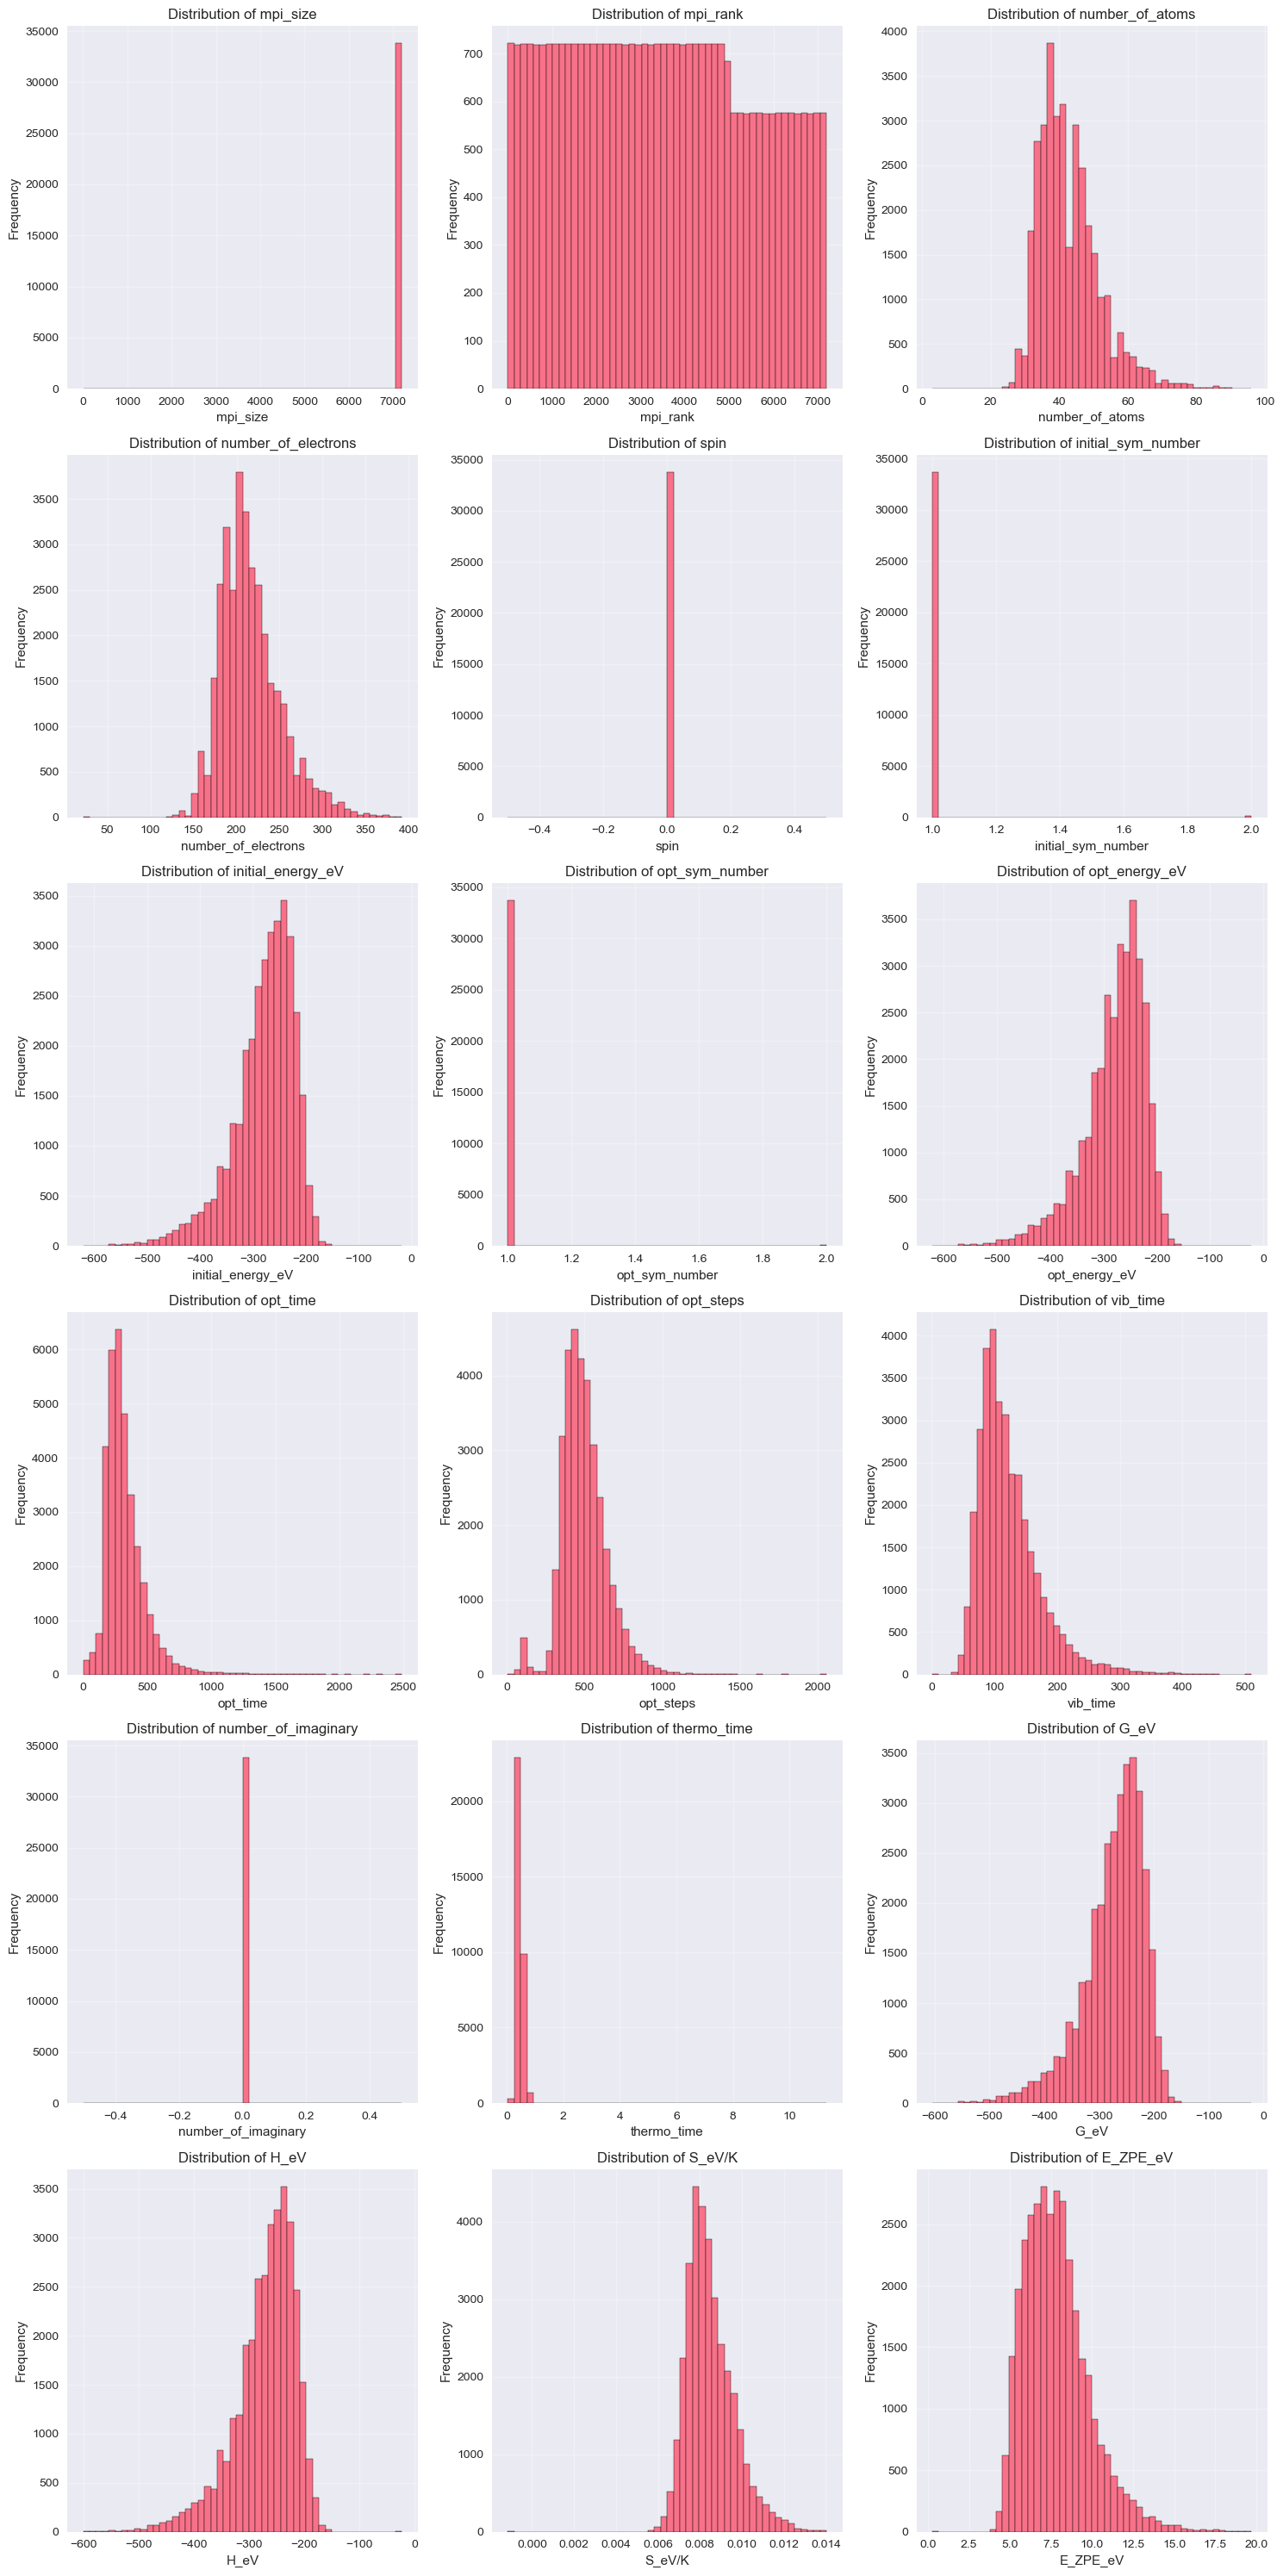

In [12]:
# Visualize distributions of numerical columns
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot")


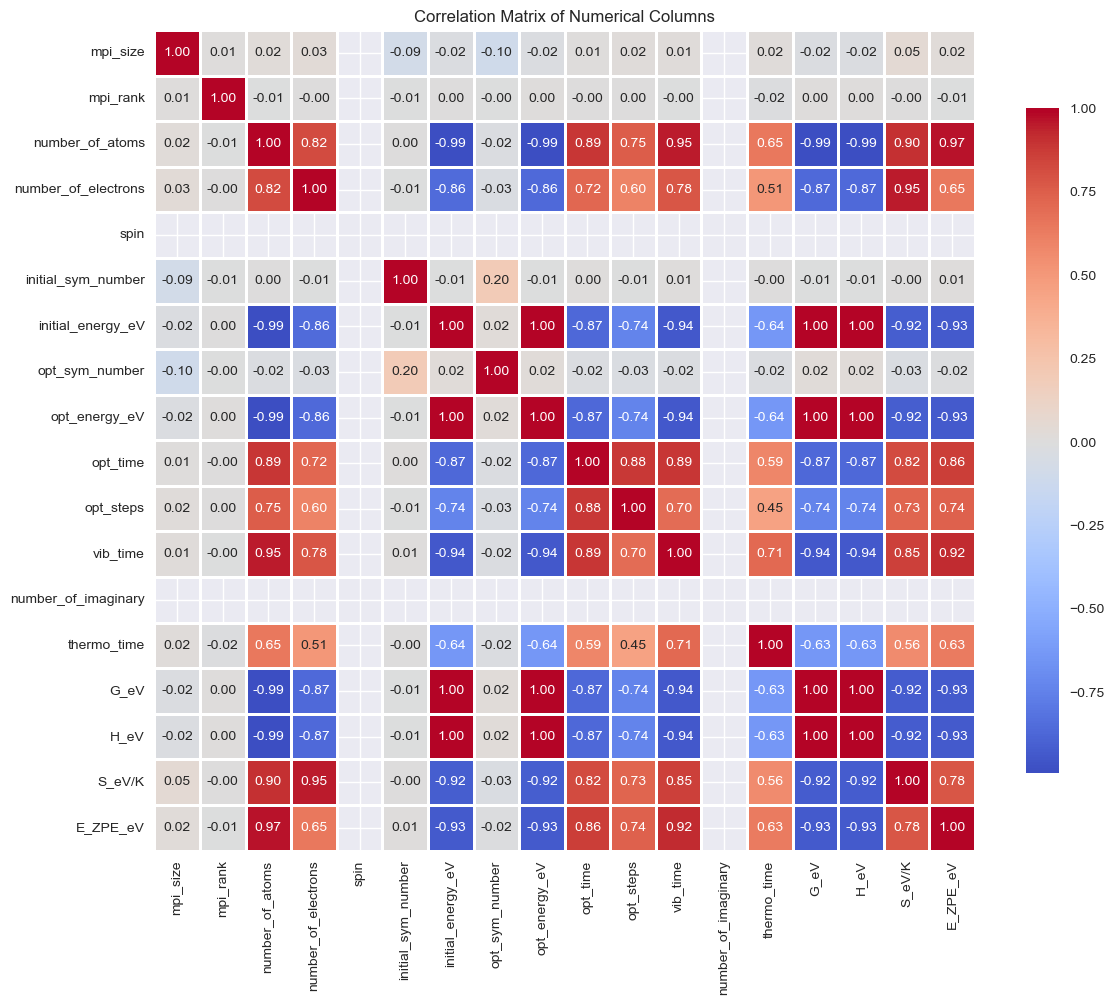


Strong correlations (|r| > 0.7):
number_of_atoms <-> number_of_electrons: 0.821
number_of_atoms <-> initial_energy_eV: -0.990
number_of_atoms <-> opt_energy_eV: -0.991
number_of_atoms <-> opt_time: 0.885
number_of_atoms <-> opt_steps: 0.753
number_of_atoms <-> vib_time: 0.952
number_of_atoms <-> G_eV: -0.990
number_of_atoms <-> H_eV: -0.990
number_of_atoms <-> S_eV/K: 0.904
number_of_atoms <-> E_ZPE_eV: 0.966
number_of_electrons <-> initial_energy_eV: -0.859
number_of_electrons <-> opt_energy_eV: -0.860
number_of_electrons <-> opt_time: 0.717
number_of_electrons <-> vib_time: 0.780
number_of_electrons <-> G_eV: -0.866
number_of_electrons <-> H_eV: -0.865
number_of_electrons <-> S_eV/K: 0.949
initial_energy_eV <-> opt_energy_eV: 0.999
initial_energy_eV <-> opt_time: -0.872
initial_energy_eV <-> opt_steps: -0.737
initial_energy_eV <-> vib_time: -0.943
initial_energy_eV <-> G_eV: 0.999
initial_energy_eV <-> H_eV: 0.999
initial_energy_eV <-> S_eV/K: -0.919
initial_energy_eV <-> E_ZPE_eV: 

In [13]:
# Correlation matrix for numerical columns
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Columns')
    plt.tight_layout()
    plt.show()
    
    # Print strong correlations
    print("\nStrong correlations (|r| > 0.7):")
    print("="*80)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_val:.3f}")
else:
    print("Not enough numerical columns for correlation analysis")


In [14]:
# Outlier detection for numerical columns
import numpy as np

print("Outlier Detection (IQR Method):")
print("="*80)

if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        if outlier_count > 0:
            outlier_summary.append({
                'column': col,
                'outlier_count': outlier_count,
                'outlier_percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'min_value': df[col].min(),
                'max_value': df[col].max(),
                'Q1': Q1,
                'Q3': Q3,
                'median': df[col].median(),
                'mean': df[col].mean()
            })
    
    if outlier_summary:
        print(f"\nFound outliers in {len(outlier_summary)} out of {len(numerical_cols)} numerical columns:\n")
        
        for summary in outlier_summary:
            print(f"\n{summary['column']}:")
            print(f"  Outliers: {summary['outlier_count']} ({summary['outlier_percentage']:.2f}%)")
            print(f"  Normal range: [{summary['lower_bound']:.4f}, {summary['upper_bound']:.4f}]")
            print(f"  Actual range: [{summary['min_value']:.4f}, {summary['max_value']:.4f}]")
            print(f"  Statistics:")
            print(f"    Q1: {summary['Q1']:.4f}, Median: {summary['median']:.4f}, Q3: {summary['Q3']:.4f}")
            print(f"    Mean: {summary['mean']:.4f}")
            
            # Show some example outlier values
            col = summary['column']
            Q1 = summary['Q1']
            Q3 = summary['Q3']
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"  Sample outlier values:")
                if len(outliers) <= 10:
                    for idx, val in outliers[col].items():
                        print(f"    Row {idx}: {val:.4f}")
                else:
                    print(f"    (Showing first 10 of {len(outliers)} outliers)")
                    for idx, val in outliers[col].head(10).items():
                        print(f"    Row {idx}: {val:.4f}")
    else:
        print(f"\nNo outliers detected in any of the {len(numerical_cols)} numerical columns using IQR method.")
else:
    print("No numerical columns found for outlier detection.")

Outlier Detection (IQR Method):

Found outliers in 15 out of 18 numerical columns:


mpi_size:
  Outliers: 1 (0.00%)
  Normal range: [7200.0000, 7200.0000]
  Actual range: [1.0000, 7200.0000]
  Statistics:
    Q1: 7200.0000, Median: 7200.0000, Q3: 7200.0000
    Mean: 7199.7870
  Sample outlier values:
    Row 33790: 1.0000

number_of_atoms:
  Outliers: 1149 (3.40%)
  Normal range: [22.0000, 62.0000]
  Actual range: [3.0000, 96.0000]
  Statistics:
    Q1: 37.0000, Median: 41.0000, Q3: 47.0000
    Mean: 42.8479
  Sample outlier values:
    (Showing first 10 of 1149 outliers)
    Row 2: 63.0000
    Row 6: 67.0000
    Row 31: 63.0000
    Row 56: 63.0000
    Row 81: 70.0000
    Row 91: 63.0000
    Row 92: 74.0000
    Row 122: 68.0000
    Row 137: 63.0000
    Row 156: 64.0000

number_of_electrons:
  Outliers: 1092 (3.23%)
  Normal range: [129.0000, 297.0000]
  Actual range: [22.0000, 392.0000]
  Statistics:
    Q1: 192.0000, Median: 210.0000, Q3: 234.0000
    Mean: 216.0030
  Sample outlier 

In [15]:
# Additional analysis: memory usage
print("Memory usage:")
print("="*80)
memory_usage = df.memory_usage(deep=True)
print(f"Total memory usage: {memory_usage.sum() / 1024**2:.2f} MB")
print("\nMemory usage per column:")
print(memory_usage.sort_values(ascending=False))


Memory usage:
Total memory usage: 160.04 MB

Memory usage per column:
initial_xyz                      54705764
opt_xyz                          54634375
initial_smiles                    6011504
opt_smiles                        5949862
xyz_file                          4447414
vibrational_frequencies_cm^-1     4054920
frequencies_cm^-1                 4054920
vib_energies                      4054920
opt_forces                        4054920
unique_name                       3653572
date                              2297788
hostname                          2095042
formula                           2089835
task                              1858505
ase_version                       1858505
model                             1824714
calculator                        1790923
initial_symmetry                  1723377
opt_sym                           1723364
S_eV/K                             270328
vib_time                           270328
G_eV                               270328
H_eV  

In [112]:
def parse_unique_name(unique_name):
    """
    Parse a unique_name string and return a dictionary with bipyridine, alkyne, and type (reactant or product).

    Parameters:
        unique_name (str): The unique name string to parse.

    Returns:
        dict: {'bipyridine': ..., 'alkyne': ..., 'role': 'reactant' or 'product'}
    """
    parts = unique_name.split('_')
    result = {}

    result['bipyridine'] = None
    result['alkyne'] = None
    result['role'] = None

    # Typical format (at least 3 components: bipyridine, alkyne, type)
    if len(parts) >= 3:
        result['bipyridine'] = parts[0].replace("bipy-", "")
        result['alkyne'] = parts[1].replace("-C2H2-", "")
        type_str = parts[2].lower()
        if "product" in type_str:
            result['role'] = "product"
        elif "reactant" in type_str:
            result['role'] = "reactant"
        elif unique_name.startswith("co2"):
            result['role'] = "co2"
        else:
            print(f"Check unique_name: {unique_name}")
    return result

def calculate_reaction_gibbs(df):
    """
    Calculate the carboxylation reaction delta G values.

    """
    parsed = df["unique_name"].apply(parse_unique_name)
    # Convert Series of dictionaries to DataFrame
    parsed_df = pd.DataFrame(parsed.tolist())
    df2 = pd.concat([df, parsed_df], axis=1)
    group_cols = ["bipyridine", "alkyne", "role"]

    # For each take lowest G conformer
    idx_min = df2.groupby(group_cols)["G_eV"].idxmin()
    df_lowest = df2.loc[idx_min].reset_index(drop=True)
    
    # Reactants
    reac = (
        df_lowest[df_lowest["role"] == "reactant"]
        [["bipyridine", "alkyne", "G_eV", "unique_name"]]
        .rename(columns={"G_eV": "G_reactant"})
    )

    # Products
    prod = (
        df_lowest[df_lowest["role"] == "product"]
        [["bipyridine", "alkyne", "G_eV","unique_name"]]
        .rename(columns={"G_eV": "G_product", "unique_name": "unique_name_product"})
    )

    df_co2 = df2[df2["role"] == "co2"]

    if len(df_co2) == 0:
            raise ValueError("No CO2 entries found — cannot compute ΔG.")
    elif len(df_co2) > 1:
        raise ValueError("Multiple CO2 entries found — cannot compute ΔG.")

    # Extract scalar value (minimum G_eV for CO2, consistent with taking lowest conformer)
    G_CO2 = df_co2["G_eV"].min()
    print(f"G_CO2 value: {G_CO2} eV")
    # -------------------------------------------------------
    # 4. Merge and compute ΔG including CO2
    # -------------------------------------------------------
    delta = reac.merge(prod, on=["bipyridine", "alkyne"], how="left")
    delta["G_CO2"] = G_CO2  # Now this is a scalar, so it will be assigned to all rows
    delta["deltaG"] = delta["G_product"] - (delta["G_reactant"] + G_CO2)

    return delta

In [16]:
import pandas as pd

def parse_unique_name(unique_name):
    parts = unique_name.split('_')
    result = {'bipyridine': None, 'alkyne': None, 'role': None}

    # FIX 1: Check CO2 first. 
    # Using .lower() ensures case insensitivity
    if unique_name.lower().startswith("co2"):
        result['role'] = "co2"
        return result

    # FIX 2: Standard parsing
    if len(parts) >= 3:
        result['bipyridine'] = parts[0].replace("bipy-", "")
        result['alkyne'] = parts[1].replace("-C2H2-", "")
        
        type_str = parts[2].lower()
        if "product" in type_str:
            result['role'] = "product"
        elif "reactant" in type_str:
            result['role'] = "reactant"
        else:
            # Fallback warning if needed
            pass
            
    return result

def calculate_reaction_gibbs(df):
    # FIX 3: Reset index to ensure concat works correctly
    df = df.reset_index(drop=True)
    
    parsed = df["unique_name"].apply(parse_unique_name)
    parsed_df = pd.DataFrame(parsed.tolist())
    
    df2 = pd.concat([df, parsed_df], axis=1)
    
    # Isolate CO2 before grouping (since it has None for bipy/alkyne)
    df_co2 = df2[df2["role"] == "co2"]
    
    if len(df_co2) == 0:
        raise ValueError("No CO2 entries found — cannot compute ΔG.")
    
    # FIX 4: Robustly handle multiple CO2 entries by taking the minimum
    G_CO2 = df_co2["G_eV"].min()
    print(f"G_CO2 value used: {G_CO2} eV")

    # Process Complexes
    # Filter out CO2 so it doesn't mess up the groupby
    df_complexes = df2[df2["role"] != "co2"]
    
    group_cols = ["bipyridine", "alkyne", "role"]
    idx_min = df_complexes.groupby(group_cols)["G_eV"].idxmin()
    df_lowest = df_complexes.loc[idx_min].reset_index(drop=True)
    
    reac = (
        df_lowest[df_lowest["role"] == "reactant"]
        [["bipyridine", "alkyne", "G_eV", "unique_name"]]
        .rename(columns={"G_eV": "G_reactant", "unique_name": "unique_name_reactant"})
    )

    prod = (
        df_lowest[df_lowest["role"] == "product"]
        [["bipyridine", "alkyne", "G_eV", "unique_name"]]
        .rename(columns={"G_eV": "G_product", "unique_name": "unique_name_product"})
    )

    # FIX 5: Consider 'inner' to only show complete reactions
    delta = reac.merge(prod, on=["bipyridine", "alkyne"], how="inner")
    
    delta["G_CO2"] = G_CO2
    delta["deltaG"] = delta["G_product"] - (delta["G_reactant"] + G_CO2)

    return delta

In [17]:
delta = calculate_reaction_gibbs(df)

G_CO2 value used: -22.222243634133 eV


Delta dataframe info:
  Shape: (5940, 8)
  Columns: ['bipyridine', 'alkyne', 'G_reactant', 'unique_name_reactant', 'G_product', 'unique_name_product', 'G_CO2', 'deltaG']
  Has 'bipyridine': True
  Has 'alkyne': True
  Has 'deltaG': True
  Unique bipyridines: 91
  Bipyridine value counts:
bipyridine
aaaaaaaa    68
faaaaaaf    68
gaaaaaaa    68
fapaapaf    68
faoaaoaf    68
Name: count, dtype: int64
  Unique alkynes: 68
  Alkyne value counts:
alkyne
pk    91
gc    91
ml    90
ge    90
nc    90
Name: count, dtype: int64

Before cleaning:
  Total rows: 5940
  Bipyridine - NaN count: 0
  Bipyridine - None count: 0
  Bipyridine - non-null count: 5940
  Alkyne - NaN count: 0
  Alkyne - None count: 0
  Alkyne - non-null count: 5940
  deltaG - NaN count: 0
  deltaG - non-null count: 5940

After cleaning:
  Total rows: 5940

Cleaned delta shape: (5940, 8)
Pivot table shape: (91, 68)


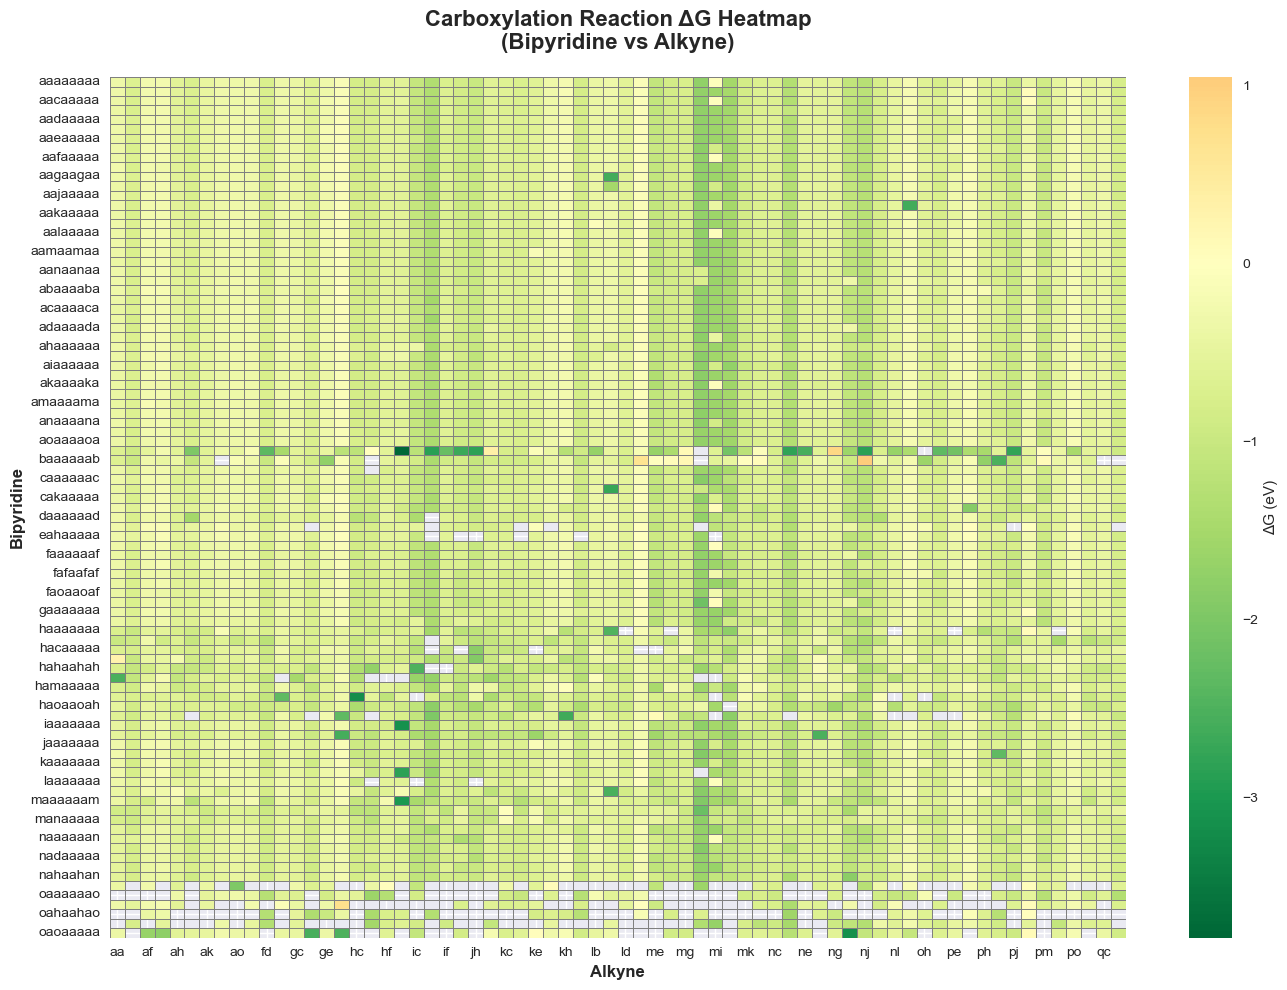


Shape of heatmap: (91, 68)

ΔG Statistics:
  Min: -3.786 eV
  Max: 1.048 eV
  Mean: -0.684 eV
  Std: 0.376 eV


In [18]:
# First, check the delta dataframe structure
print("Delta dataframe info:")
print(f"  Shape: {delta.shape}")
print(f"  Columns: {list(delta.columns)}")
print(f"  Has 'bipyridine': {'bipyridine' in delta.columns}")
print(f"  Has 'alkyne': {'alkyne' in delta.columns}")
print(f"  Has 'deltaG': {'deltaG' in delta.columns}")
if 'bipyridine' in delta.columns:
    print(f"  Unique bipyridines: {delta['bipyridine'].nunique()}")
    print(f"  Bipyridine value counts:\n{delta['bipyridine'].value_counts().head()}")
if 'alkyne' in delta.columns:
    print(f"  Unique alkynes: {delta['alkyne'].nunique()}")
    print(f"  Alkyne value counts:\n{delta['alkyne'].value_counts().head()}")

# Create a pivot table for the heatmap
# First, check what we have
print("\nBefore cleaning:")
print(f"  Total rows: {len(delta)}")
if 'bipyridine' in delta.columns:
    print(f"  Bipyridine - NaN count: {delta['bipyridine'].isna().sum()}")
    print(f"  Bipyridine - None count: {(delta['bipyridine'] == None).sum() if 'bipyridine' in delta.columns else 0}")
    print(f"  Bipyridine - non-null count: {delta['bipyridine'].notna().sum()}")
if 'alkyne' in delta.columns:
    print(f"  Alkyne - NaN count: {delta['alkyne'].isna().sum()}")
    print(f"  Alkyne - None count: {(delta['alkyne'] == None).sum() if 'alkyne' in delta.columns else 0}")
    print(f"  Alkyne - non-null count: {delta['alkyne'].notna().sum()}")
if 'deltaG' in delta.columns:
    print(f"  deltaG - NaN count: {delta['deltaG'].isna().sum()}")
    print(f"  deltaG - non-null count: {delta['deltaG'].notna().sum()}")

# Filter out rows with None/NaN in bipyridine or alkyne
# Replace None with NaN first, then drop
delta_clean = delta.copy()
if 'bipyridine' in delta_clean.columns:
    delta_clean['bipyridine'] = delta_clean['bipyridine'].replace([None], np.nan)
if 'alkyne' in delta_clean.columns:
    delta_clean['alkyne'] = delta_clean['alkyne'].replace([None], np.nan)
if 'deltaG' in delta_clean.columns:
    delta_clean['deltaG'] = delta_clean['deltaG'].replace([None], np.nan)

# Drop rows where any of these columns are missing
delta_clean = delta_clean.dropna(subset=['bipyridine', 'alkyne', 'deltaG'])

print(f"\nAfter cleaning:")
print(f"  Total rows: {len(delta_clean)}")

if delta_clean.empty:
    print("\nError: No valid data after removing NaN/None values.")
    print("This means all rows have missing values in bipyridine, alkyne, or deltaG columns.")
    print("\nSample of original delta dataframe (first 5 rows):")
    print(delta.head())
    print("\nData types:")
    print(delta.dtypes)
else:
    print(f"\nCleaned delta shape: {delta_clean.shape}")
    delta_pivot = delta_clean.pivot_table(
        index='bipyridine',
        columns='alkyne',
        values='deltaG',
        aggfunc='mean'  # In case there are multiple values, take the mean
    )
    
    print(f"Pivot table shape: {delta_pivot.shape}")
    
    # Check if we have valid data
    if delta_pivot.empty or delta_pivot.size == 0:
        print("Error: Pivot table is empty. Cannot create heatmap.")
    else:
        # Get valid (non-NaN) values for determining center
        valid_values = delta_pivot.values[~np.isnan(delta_pivot.values)]
        
        if len(valid_values) == 0:
            print("Error: No valid deltaG values found. Cannot create heatmap.")
        else:
            # Determine if we should center at 0 (only if we have values on both sides)
            has_positive = (valid_values > 0).any()
            has_negative = (valid_values < 0).any()
            use_center = has_positive and has_negative
            
            # Create the heatmap
            plt.figure(figsize=(14, 10))
            heatmap_kwargs = {
                'data': delta_pivot,
                'annot': False,  # No annotations, just colors
                'cmap': 'RdYlGn_r',  # Red-Yellow-Green reversed (red for positive, green for negative)
                'cbar_kws': {'label': 'ΔG (eV)'},
                'linewidths': 0.5,
                'linecolor': 'gray'
            }
            
            # Only center at 0 if we have values on both sides
            if use_center:
                heatmap_kwargs['center'] = 0
            
            heatmap = sns.heatmap(**heatmap_kwargs)
            plt.title('Carboxylation Reaction ΔG Heatmap\n(Bipyridine vs Alkyne)', fontsize=16, fontweight='bold', pad=20)
            plt.xlabel('Alkyne', fontsize=12, fontweight='bold')
            plt.ylabel('Bipyridine', fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # Print some statistics
            print(f"\nShape of heatmap: {delta_pivot.shape}")
            print(f"\nΔG Statistics:")
            print(f"  Min: {delta_clean['deltaG'].min():.3f} eV")
            print(f"  Max: {delta_clean['deltaG'].max():.3f} eV")
            print(f"  Mean: {delta_clean['deltaG'].mean():.3f} eV")
            print(f"  Std: {delta_clean['deltaG'].std():.3f} eV")

In [19]:
import plotly.express as px

# Create interactive heatmap
fig = px.imshow(
    delta_pivot,
    labels=dict(x="Alkyne", y="Bipyridine", color="Delta G (eV)"),
    color_continuous_midpoint=0,
    x=delta_pivot.columns,
    y=delta_pivot.index,
    color_continuous_scale='RdYlGn_r', # Red-Yellow-Green reversed
    aspect="auto", # Allows the squares to be non-square to fit the screen
    origin='lower' # Matches standard plot orientation
)

# Update layout for better viewing
fig.update_layout(
    title='Interactive Carboxylation ΔG Heatmap',
    width=1200,
    height=1000,
    xaxis_tickangle=-90
)

fig.show()

In [20]:
# Get the 10 rows with the lowest G_eV values
lowest_g_ev = df.nsmallest(10, "G_eV")

# Print relevant columns for these rows
print(lowest_g_ev[["G_eV", "opt_converged", "smiles_changed", "number_of_imaginary", "unique_name"]])


             G_eV  opt_converged  smiles_changed  number_of_imaginary  \
30488 -604.224161           True           False                    0   
21407 -604.216565           True           False                    0   
8991  -581.627313           True           False                    0   
10445 -581.604012           True            True                    0   
31283 -580.224019           True           False                    0   
14060 -580.088419           True           False                    0   
28661 -574.877151           True           False                    0   
27194 -574.735034           True           False                    0   
33325 -559.521210           True           False                    0   
16940 -559.026706           True           False                    0   

                                             unique_name  
30488  bipy-oalaalao_p-C2H2-o_productB_20301_4060_202...  
21407  bipy-oalaalao_p-C2H2-o_productA_6188_1237_2025...  
8991   bipy-oalaala

In [21]:
lowest_g_ev = df.nsmallest(10, "G_eV")

# Print relevant columns for these rows
print(df.nlargest(10,"number_of_imaginary")[["G_eV", "opt_converged", "smiles_changed", "number_of_imaginary", "unique_name"]])

         G_eV  opt_converged  smiles_changed  number_of_imaginary  \
0 -254.385225           True           False                    0   
1 -199.513231           True           False                    0   
2 -411.894919           True           False                    0   
3 -276.055341           True           False                    0   
4 -254.843025           True           False                    0   
5 -253.819848           True           False                    0   
6 -434.427666           True           False                    0   
7 -236.843631           True           False                    0   
8 -350.145900           True           False                    0   
9 -280.882070           True           False                    0   

                                         unique_name  
0  bipy-laaaaaaa_m-C2H2-j_productA_1_2165_433_202...  
1  bipy-aaaaaaaa_a-C2H2-f_productB_1_2166_433_202...  
2  bipy-haoaaoah_g-C2H2-f_productB_1_2168_433_202...  
3  bipy-aiaaaaaa_i-C